I have been putting off with blog postsings lately, largely because I was preoccupied with learning new languages I decided to pick up out of whim. Although I'm still learning the basics of these languages, namely HTML, CSS, and Javascript, I'm enjoying the process. I still have no idea where this spontaneous journey will take me, but hopefully I can make use of it in one way or another. 

The topic for today's post is Monte Carlo methods, something that I have been very interested in for a long time, admittedly because of its eye-catching name. Contrary to my original expectation, Monte Carlo is not named after an eponymous mathematician, but a gambling hot spot in Monaco. The logic behind this nomenclature is that the simulation of random outcomes, such as in the context of an unpredictable gambling game, is what Monte Carlo methods are best suited for. To present a more formal definition, Monte Carlo methods refer to a broad category of  algorithms that use repeated random sampling to make estimations of unknown parameters. Basically, MC methods work by cleverly sampling from a distribution to estimate a variable of interest. This versatility is why MC method is such a powerful tool in the statistician's arsenal.

In today's post, we will attempt to solve various bite-sized tasks using MC methods. These tasks will be of varying difficulty, but taken together, they will collectively demonstrate the useful applications of MC methods. Let's get started with the first up on the list: estimating $\pi$.

# Pi Estimation 

We all know from basic geometry that the value of $\pi$ approximates to $3.14$. There are obviously various ways to derive this value. Archimedes famously used hexagons to estimate that the value of $\pi$ lies between $(\frac{22}{7}, \frac{223}{71})$. With later advances in math, mathematicians began to approach this problem from the angle of infinite series or products, the result of which were the [Leibniz formula], [Wallis product], [Euler product], and the likes. And of course, modern computing now allows us to borrow the prowess of machinery to calculate this quantity with extreme accuracy.

While the maths behind these derivations are fascinating, our approach will not take these routes; instead, we will use a crude Monte Carlo method. First, we draw a two-by-two square, inside of which we inscribe a circle of radius 1. For convenience purposes, let's center this circle and square both at the origin. Next, we generate a series of random coordinates within the region of the square. Then, we count the percentage of dots that fall within the area of the cricle. Using a simple formula of proportions, we can calculate the area of the circle, through which we can then estimate the value of $\pi$. Before we get into the specifics of this algorithm, let's see hwo this plays out in code.

In [86]:
# Brief setup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

In [71]:
def generate_point(sample_num):
    global in_x, in_y, out_x, out_y
    x = 2*np.random.random(sample_num) - 1
    y = 2*np.random.random(sample_num) - 1
    in_x, in_y = x[(x*x + y*y) <= 1], y[(x*x + y*y) <= 1]
    out_x, out_y = x[(x*x + y*y) > 1], y[(x*x + y*y) > 1]
    return len(in_x)/sample_num * 4
    
def draw_plot():
    fig, ax = plt.subplots(1)
    ax.scatter(in_x, in_y, color="skyblue", edgecolor=None)
    ax.scatter(out_x, out_y, color="gold", alpha=0.8, edgecolor=None)
    ax.add_artist(plt.Circle((0, 0), 1, alpha=0.5, color='white'))
    ax.set_aspect('equal')
    plt.xlim((-1, 1)); plt.ylim((-1, 1))
    plt.show()

Now that we have the function ready, let's try calling it with some input parameters. Below, we perform our little crude Monte Carlo simulation with a hundred randomly generated data points. Invoking the `generate_point` function returns the value of the estimation. 

In [72]:
generate_point(10)

2.8

The returned result is not abysmal, but we clearly can do a lot better. The reason behind this spotty estimation can be checked by drawing the plot of the Monte Carlo simulation, as shown below.

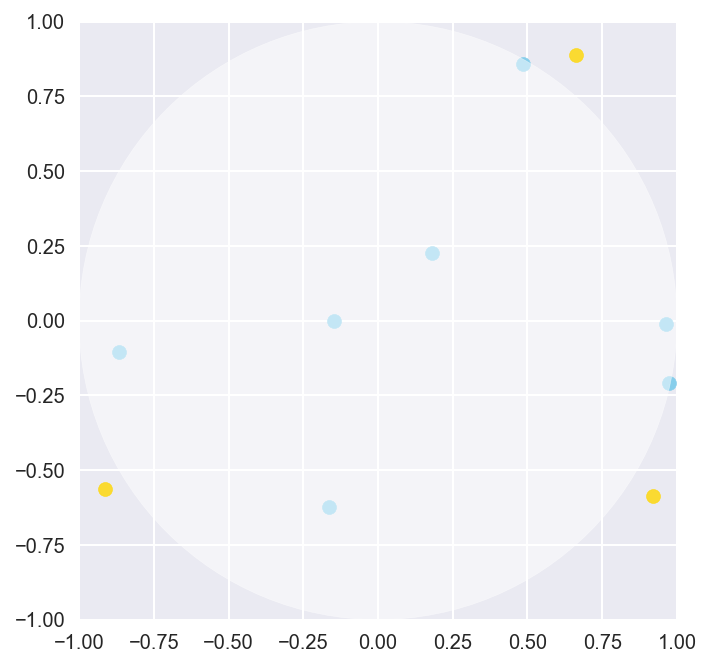

In [73]:
draw_plot()

As we can see, ten samples simply aren't enough to really cover the entire area of the plane or the circle. Although we do get some points in the circle, it's really hard to tell if the proportion of points in and out of the circle is going to be representative of the actual proportion of area between the circle and the square. Let's push our MC algorithm to do a bit more by sampling more data points, this time with 100000 randomly generated points.

In [74]:
generate_point(100000)

3.13516

As expected, with more data points, we get a better estimation of pi. Although the randomness created by the `np.random` call in our function means that this estimation will fluctuate with each execution, the value is reliably close to the actual value of $\pi$, differing only by about 0.01 or less. If we draw the plot for our experiment, it is clear that our data points accurately capture the proportionality between the area of the square and the circle. 

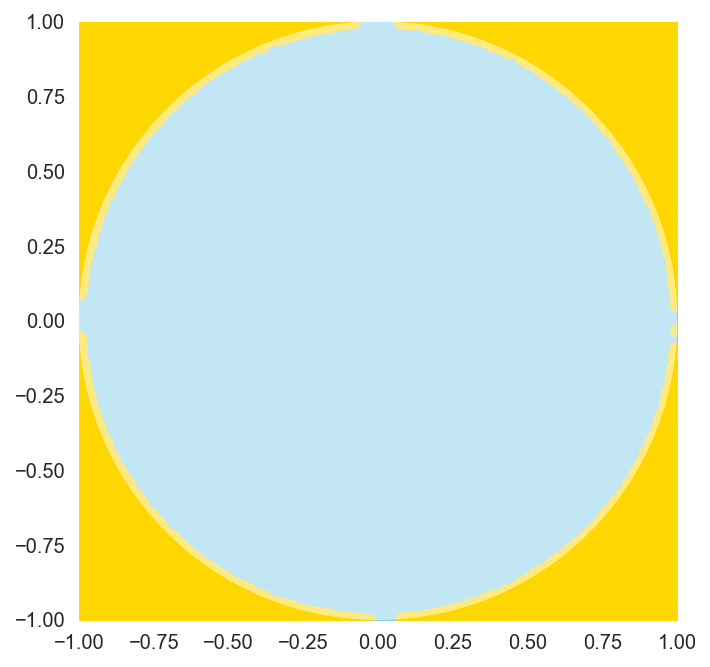

In [75]:
draw_plot()

We can systematically verify that more samples tend to yield better results by graphing the magnitude of the error of our estimation plotted against the number of random samples generated. 

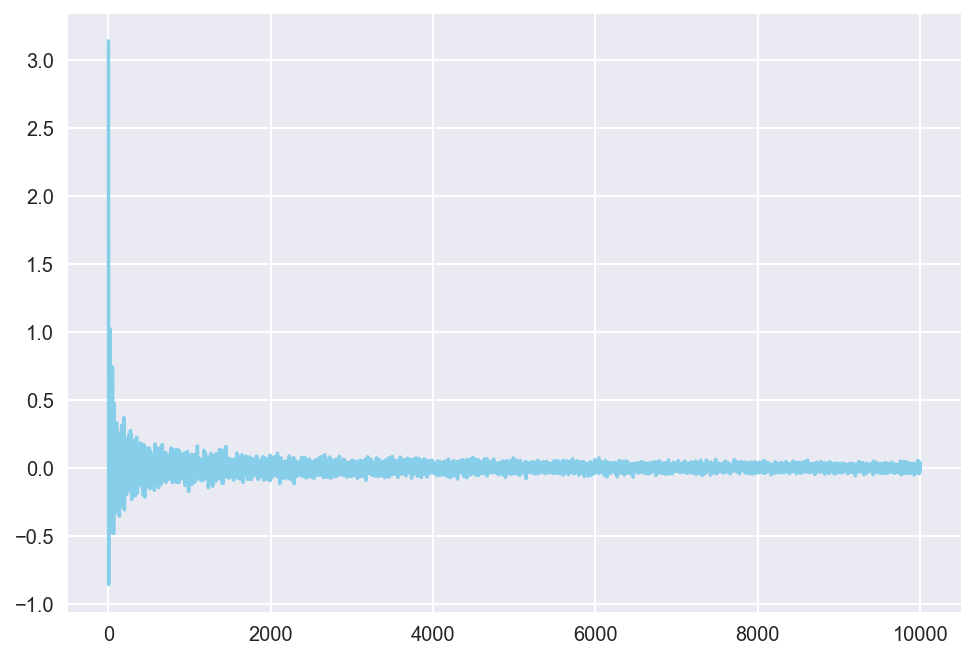

In [76]:
x = np.arange(1, 10000)
y = [np.pi - generate_point(i) for i in x]

plt.plot(x, y, color="skyblue")
plt.show()

The plot shows that, with larger sample sizes, the error quickly converges to around 0. Although the rate of convergence dramatically decreases after the first few iterations, the pattern of convergence is apparrent.

So how does this work? The mechanism is extremely simple: if we were to randomly generate an infinite number of dots, the proportion of the number of dots that fall within the circle versus those that do not fall within it would converge to some constant, *i.e.* $\pi:4-\pi$. Why is this the case? Intuitively, the larger the area, the larger the number of points that fall into that area. Given this proportional relationship, the number of randomly generated points in an area after a simulation would mirror the actual area of the circle and the rectangle, hence the proportional expression above. By following this line of reasoning, we can then resort to Monte Carlo to generate these random points, after which we can make a reasonable estimation of $\pi$. 

But approximation is not the only domain in which Monte Carlo methods become useful--they can also be used to calculate complicated integrals.

# Integral Calculation

We all know from calculus class that integration can be difficult. Everyone has encountered integrals of varying monstrosity at one point in their lives, scrambling to solve it with integration by parts or some obscure, creative substitution, only to realize that everything wounds up in the middle of nowhere. Well, good news for all of us---Monte Carlo methods can be used to estimate the value of mind-pulverizing, complicated definite integrals. 

Let's say we want to estimate the value of an integral of a function $f$ over some domain $D$. 

$$F = \int_D^{} f(x) \ dx$$

Now assume that there is some probability density function $p(x)$ defined over $D$. Then, we can alter this integral as  shown below.

$$F = \int_D^{} \frac{f(x)}{p(x)} p(x) \ dx$$

Notice that this integral can now be understood as an expected value for some continuous random variable. In other words, $F$ collapses into the following expression.

$$F = E\left[ \frac{f(x)}{p(x)}\right]$$

What does this tell us? This means that we can simply calculate an integral by randomly sampling the values of $f(x)$ such that $x$ follows some probability distribution $p(x)$. The probability distribution part simply ensures that values of $x$ that are more probable are sampled more often than others. Intuitively, we are effectively taking a weighted mean of the values of $f(x)$, which is the loose definition of expected values. Now, to simplify things a bit, we are going to take a look at an example that does not involve much probability distributions. Conside the following integal of sine, a classic in calculus 101:

$$\int_0^1 \sin(x) \ dx$$

The reason why we chose this integral is that we know how to calculate it by hand. Therefore, we can match the accuracy of our crude Monte Carlo against an actual, known value. Let's fist quickly compute this integral.

$$\int_0^1 \sin(x) \ dx = -\cos(x)\rvert_0^1 = -\cos(1) + \cos(0) \approx 0.46$$

Now time for Monte Carlo. Notice that there is no probability distribution explicitly defined over the domain of integration in our example. In other words, $x$ simply follows a continuous uniform distribution, meaning that all values of $x$ within $[0, 1]$ are equally likely. All we have to do, therefore, is to compute the expected value of the integrand by randomly generating a series of numbers within the specified domain, plug those values into the function $\sin(x)$, and take their average. 

In [77]:
def integral_calculator(func, start, end, sample_num):
    x = np.random.uniform(low=start, high=end, size=(sample_num,))
    y = func(x)
    return np.mean(y)

This is a very elementary function that simply generates a specified number of samples given `sample_num` within the domain `[start, end]`. These numbers are then plugged into the function `func`, after which an unweighted mean of these values are computed to approximate an integral. Let's test the accuracy of this crude Monte Carlo method by using our example of $\sin(x)$ computed earlier.

In [78]:
integral_calculator(np.sin, 0, 1, 10)

0.3801234154353964

The result is a very poor approximation that is way off, most likely because we only used ten randomly generated numbers. Much like earlier, however, we would expect Monte Carlo to perform better with larger samples.

In [139]:
integral_calculator(np.sin, 0, 1, 1000)

0.4564203853429202

The example we have analyzed so far was a very simple one, so simple that we would probably have been better off calculating the integral by hand than writing code. That's why it's time to put our crude Monte Carlo to the test with integrals more difficult to compute. Consider the following expression:

$$F = \int_0^1 \frac{e^{-x}}{1 + (x - 1)^2} \ dx \tag{1}$$

One might try calculating this integral through substitution or integration by parts, but let's choose not to for the sake of our mental health. Instead, we can model the integrand in Python and ask Monte Carlo to do the work for us. Concretely, this process might look as follows.

In [80]:
def my_func(x):
    return np.exp(-x)/(1 + (x - 1)**2)

We can now plug this function into our crude Monte Carlo `integral_calculator` and hope that the algorithm will provide us with an accurate estimation of this expression.

In [81]:
integral_calculator(my_func, 0, 1, 1000)

0.4676957788776292

So we have a number! But how do we know if this is an accurate estimation? Unlike in previous problems, where we already knew the true value of our estimate and measured the error of our simulation by comparing it with the known value, the true value of the integral expression is unknown in this problem because we have not evaluated the integral by hand. 

One way we can go about this dilemma is to calculate variance. Intuitively, if our estimate is indeed accurate, running the same Monte Carlo simulation would yield a value very similar to that of the previous. Conversely, if our estimate is inaccurate, the variance would be large, suggesting that our estimate has not converged to a value yet. Indeed, this is exactly what we attempted to visualize with the error plot above in our $\pi$ estimation example. However, in most cases where Monte Carlo methods are used, we have no idea about the true value of the quantity we wish to estimate, like the complicated integral problem in this case, which is why we cannot simply calculate error by substracting our estimate from the true value. 

As we might recall, variance measures, quite simply, the degree of variability in our data. The well-known formula for variation goes as follows.

$$V[X] = E[(X - E[X])^2] = E[X^2] - E[X]^2$$

Using this formula, let's plot variance against the number of samples to see what effect increasing the sample size has on variance. 

In [167]:
def variance(data):
    E_X = np.mean(np.square(data))
    E_X2 = np.mean(data)**2
    return E_X - E_X2

The `variance` function accepts a list as an argument and returns the variance seen in the given data set. Now that we have this function ready, let's use it to plot variance against the number of samples used in crude Monte Carlo integration

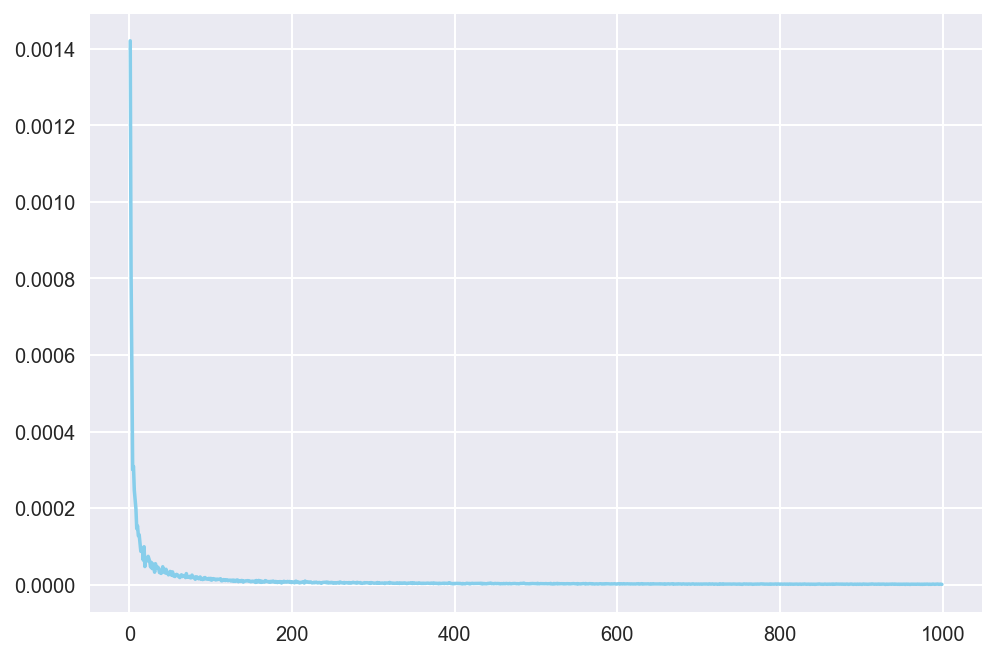

In [172]:
x = np.arange(1, 1000)
y = [variance([integral_calculator(my_func, 0, 1, i) for _ in range(100)]) for i in x]

plt.plot(x, y, color="skyblue")
plt.show()

Notice that variance quickly converges to near zero as the number of samples gets larger! This means that, even if we do not know the true value of the integral expression, we can now be confident that the output of the crude Monte Carlo will have converged to an approximation of the true value with sampling size as big as 1000, or even something like 400. This gives us more confidence in saying that the integral expression in (1) is approximates to 0.247. 

The crude Monte Carlo algorithm we employed here used simple random sampling to generate a series of random numbers to be used for our estimation. Crude Monte Carlo is powerful, but in a way it is inefficient because we have to sample large amounts to ensure that the resulting sample is representative, which is a condition that must be satisfied to produce a reliable estimate. There are a plethora of mathematical techniques that build on top of crude Monte Carlo to ensure that sampling is done correctly and more efficiently, such as [importance sampling], but for the purposes of this post, we will stop here and move onto the last task: simulating random walk.

# Random Walk

The last task we will deal with in this post is simulating what is known as the drunkard's walk, a version of which is introduced [here]. The drunkard's walk is a type of random walk with a specified termination condition. As the name suggests, the drunkard's walk involves a little story of an intoxicated man trying to reach (or avoid) some destination, whether that be a cliff or, in our case, a restroom. Because he is drunk, he cannot walk to the restroom in a straight path as a normal person would do; instead, he stumbles this way and that, therefore producing a random walk. Our goal here is to simulate this motion many times to estimate the probability that the man would successfully end up in the restroom to go about his business. This example was borrowed from [this post] by Zacharia Miller. 

Before we start typing up some code, let's first lay down the ground rules of this simulation. First, we assume that the pub is modeled as a ten-by-ten grid, the bottom-left point defined as $(0, 0)$ and the top-right $(10, 10)$. The drunkard will start his walk at his table, represented by the coordinate $(5, 5)$. For each walk, function will generate a random number to determine the direrction of his movement. The magnitude of each walk is 1 by default. Beforer a walk is performed, we will invoke another function to check if his movements are legal, *i.e.* whether he stepped out of the boundary of the pub. If his moves are legal, we continue with the movement; if not, we stop and assume that the trial has yielded a failure. The goal of this random walk is to end up in the top-right portion of the pub, a square defined by coordinates $(8, 8), (8, 10), (10, 8)$, and $(10, 10)$. 

Now that we have established the basics of this game, let's start coding away.

In [535]:
def take_step(position, step_size):
    angle = np.random.uniform(0, 2*np.pi)
    new_x = position[0] + step_size*np.cos(angle)
    new_y = position[1] + step_size*np.sin(angle)
    return [new_x, new_y]

def check_legal(position, range=[0, 10]):
    return range[0] < position[0] < range[1] and range[0] < position[1] < range[1]

def check_success(position, range=[8, 10]):
    return range[0] < position[0] < range[1] and range[0] < position[1] < range[1]

def simulate_walk(trial, step_size=1, start=[5, 5], goal=[9, 10]):
    flag, position_tracker = False, [start]
    for _ in range(trial):
        new_position = take_step(position_tracker[-1], step_size)
        if check_legal(new_position):
            position_tracker.append(new_position)
            if check_success(new_position):
                flag = True
                break
        else:
            break
    return flag, position_tracker

Our little random walk simulator is now ready to go! Let's perform a quick sanity check to see if the code works as expected.

In [543]:
simulate_walk(100, 1)

(False,
 [[5, 5],
  [5.656157999702708, 4.245376465099225],
  [6.646103304620497, 4.1039257907592805],
  [5.891903714840707, 4.760571036516833],
  [5.562912015927142, 3.816238223338149],
  [5.799732437073788, 2.844684782642309],
  [6.425045114520803, 2.064310477949974],
  [5.544931386997982, 1.5895475617213732],
  [5.467835984866107, 0.5925238413565443],
  [4.506223379403992, 0.8669344771131837],
  [5.18837324677812, 0.1357220876930788]])

We see that the returned tuple contains the flag boolean value as well as a list containing the coordinates of the first ten steps the drunkard took in this experiment, which is exactly what we expected. Now it is time to put this Monte Carlo application to the test by simulating the walk many times and counting the instances of successes verses failures. 

In [537]:
def random_walks(simulate_num, limit=100):
    success, total_steps = 0, 0
    for _ in range(simulate_num):
        trial = simulate_walk(limit, 1)
        success += trial[0]
        total_steps += trial[0]*len(trial[1])
    return success/simulate_num, total_steps/simulate_num

The `random_walks` function calls the `simulate_walk` function as many times specified by `simulate_num`. The function compiles all the results to return two pieces of information: the percentage of success, represented in decimals, and the average number of steps it took for the drunkard to reach the restroom. Notice that there is a 100-step cap, meaning if the drunkard was not able to find the restroom after a hundred steps, the trial was assumed a failure. 

We can verify the functionality of our design by calling the function. 

In [539]:
random_walks(10000)

(0.105, 3.0807)

Cool! The Monte Carlo algorithm thus tells us that the probability of success is about 10 percent, which is a lot smaller thant I had personally anticipated. Think about how complicated it would have been to calculate this probability by hand. By simulating this game multiple times and counting the instances of successes, we can derive an estimation of the success rate of our particular random walk model. 

In [548]:
def plot_walks(trial, walk_episodes):
    walk_paths = []
    for _ in range(walk_episodes):
        walk_paths.append(simulate_walk(trial, 1)[1])
    for walk_path in walk_paths:
        x, y = zip(*walk_path)
        plt.plot(x, y)
    plt.plot([8,10,10,8,8],[8,8,10,10,8], color="black", ls="--")
    plt.xlim(-0.5, 10.5); plt.ylim(-0.5, 10.5)

Let's see what happens when we simulate the drunkard's walk thirty times. In the particular instance that I have below, we see that the drunkard successfully reached the rest room four out of thirty attempts, which roughly equals the success probability of ten percent we saw earlier. 

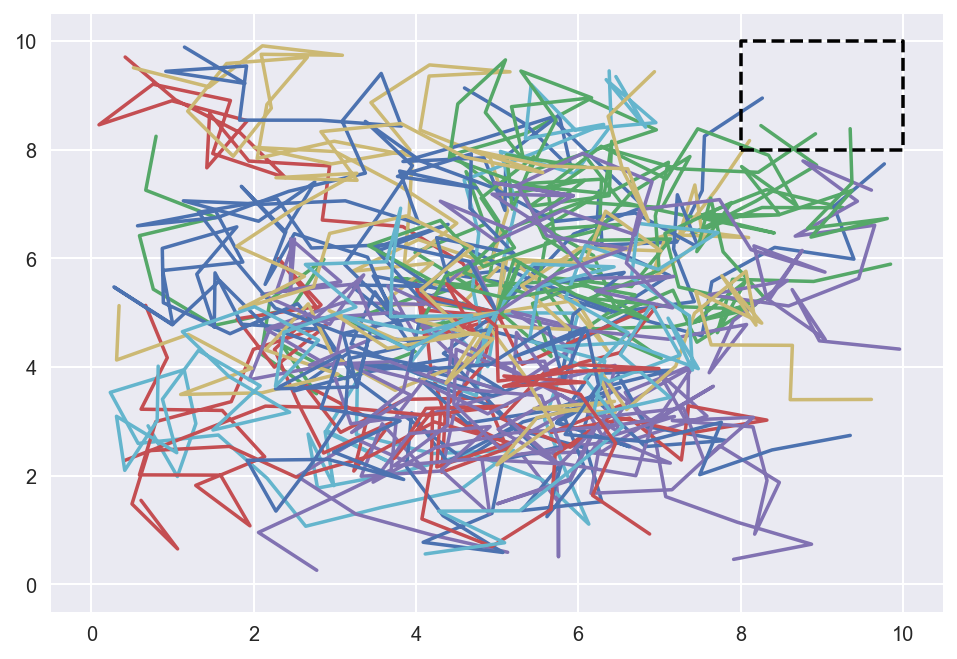

In [551]:
plot_walks(100, 30)

# Conclusion

By now, hopefully you have been convinced that Monte Carlo is a powerful method of solving problems. Although the examples we looked at were mostly simple, these algorithms can easily be applied to solve much harder ones. Simply put, Monte Carlo uses a brute force method to simulate a particular instance of a model multiple times. Through such repeated sampling, we are able to gain a better understanding of the parameters underlying the issue at hand. This is a pattern that we saw with all three tasks we dealt with in today's post. 

This sums up our post on Monte Carlo methods. In a future post, we will take a look at [Markov Chain Monte Carlo], particularly [Metropolis-Hastings], which uses the best of both worlds to analyze complicated probability distributions. I'm already excited for that post, because MCMC methods will bring together so many concepts that we have dealt with on this blog so far---ranging from [Bayesian inference], probability distributions, [Markov chains], and so many more. Catch you up on the next one!

[Leibniz formula]: https://en.wikipedia.org/wiki/Leibniz_formula_for_π
[Wallis product]: https://jaketae.github.io/study/basel-zeta/
[Euler product]: https://en.wikipedia.org/wiki/Euler_product
[importance sampling]: https://en.wikipedia.org/wiki/Importance_sampling
[here]: https://medium.com/i-math/the-drunkards-walk-explained-48a0205d304 
[this post]: http://zwmiller.com/projects/monte_carlo_part1.html
[Markov Chain Monte Carlo]: https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo
[Metropolis-Hastings]: https://en.wikipedia.org/wiki/Metropolis–Hastings_algorithm
[Bayesian inference]: https://jaketae.github.io/study/bayes/
[Markov chains]: https://jaketae.github.io/study/pagerank-and-markov/